# MNIST Data (Reduced)

- This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
- https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data


In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd

## Data


In [18]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = (
    X_train_.astype(np.float32) / 255.0,
    X_test_.astype(np.float32) / 255.0,
)

In [19]:
print(X_train_.shape)
print(X_test_.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [20]:
# Reduce dimension size
np.random.seed(0)

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train_[idx]
y_train = y_train[idx]
X_test = X_test_[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28)
(2000, 28, 28)
(2000,)
(2000,)


## Model building

- Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:


In [21]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu", name="hidden1"),
        tf.keras.layers.Dense(10, activation="softmax", name="output"),
    ]
)

## Compile model

- Prepare for fitting


In [22]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Training (Fitting)

- The `Model.fit` method adjusts the model parameters to minimize the loss:


In [24]:
tf_fit = model.fit(X_train, y_train, validation_split=0.1, epochs=40)

Epoch 1/40


57/57 [==============================] - 1s 4ms/step - loss: 1.1283 - accuracy: 0.6939 - val_loss: 0.5848 - val_accuracy: 0.8450
Epoch 2/40
57/57 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8778 - val_loss: 0.4144 - val_accuracy: 0.9050
Epoch 3/40
57/57 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.9083 - val_loss: 0.3679 - val_accuracy: 0.9050
Epoch 4/40
57/57 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.9367 - val_loss: 0.3480 - val_accuracy: 0.9150
Epoch 5/40
57/57 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9511 - val_loss: 0.3497 - val_accuracy: 0.9050
Epoch 6/40
57/57 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.9611 - val_loss: 0.3494 - val_accuracy: 0.9150
Epoch 7/40
57/57 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9667 - val_loss: 0.3352 - val_accuracy: 0.9100
Epoch 8/40
57/57 [=============

In [25]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.128281,0.693889,0.584803,0.845
1,0.451827,0.877778,0.414364,0.905
2,0.336556,0.908333,0.367930,0.905
3,0.257743,0.936667,0.348030,0.915
4,0.206090,0.951111,0.349720,0.905


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

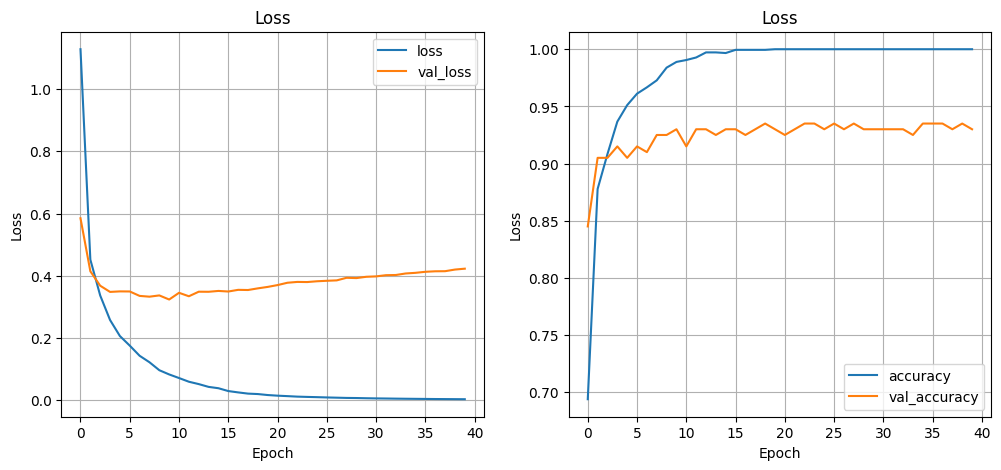

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["accuracy", "val_accuracy"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

## Evaluation

- The `Model.evaluate` method checks the models performance.


In [27]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 0.8740


[0.541892945766449, 0.8740000128746033]

In [28]:
y_hat = model(X_test)
print(y_hat.shape)
print(y_hat.numpy()[:2])

(2000, 10)
[[2.3924158e-09 5.6078071e-09 2.5790430e-06 4.7873904e-04 9.9798918e-01
  3.7696876e-10 1.0033244e-10 1.1124717e-05 2.6099464e-10 1.5183240e-03]
 [1.4397139e-07 1.2869629e-10 3.9528142e-10 1.5227626e-07 3.8583176e-10
  9.9999750e-01 1.0672140e-11 3.5059546e-11 2.2379456e-06 7.5595167e-08]]


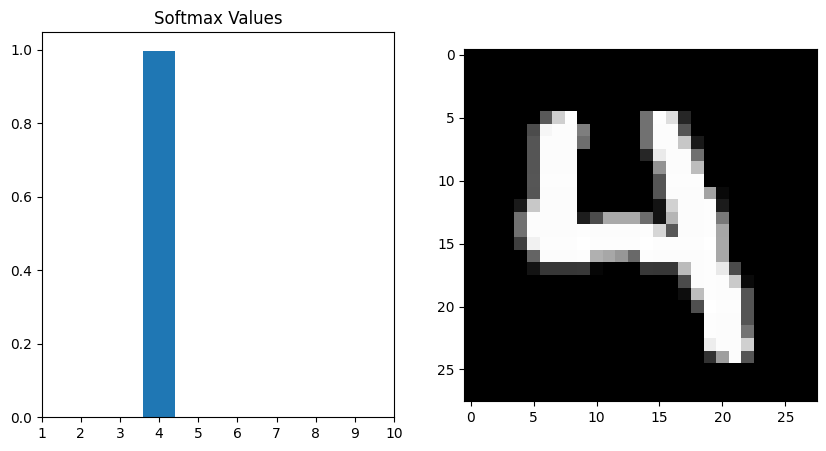

In [29]:
x_ticklabel = [i + 1 for i in range(10)]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))
axes[0].bar(xp, yp)
axes[0].set_title("Softmax Values")
axes[0].set_xticks(x_ticklabel)
axes[0].set_xticklabels(x_ticklabel)
axes[0].set_xlim([1, 10])
axes[1].imshow(X_test[0], cmap="gray")
plt.show()

In [30]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf, axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f"Missclassification = {loc.sum()}")

(2000,)
(2000,)
Missclassification = 252


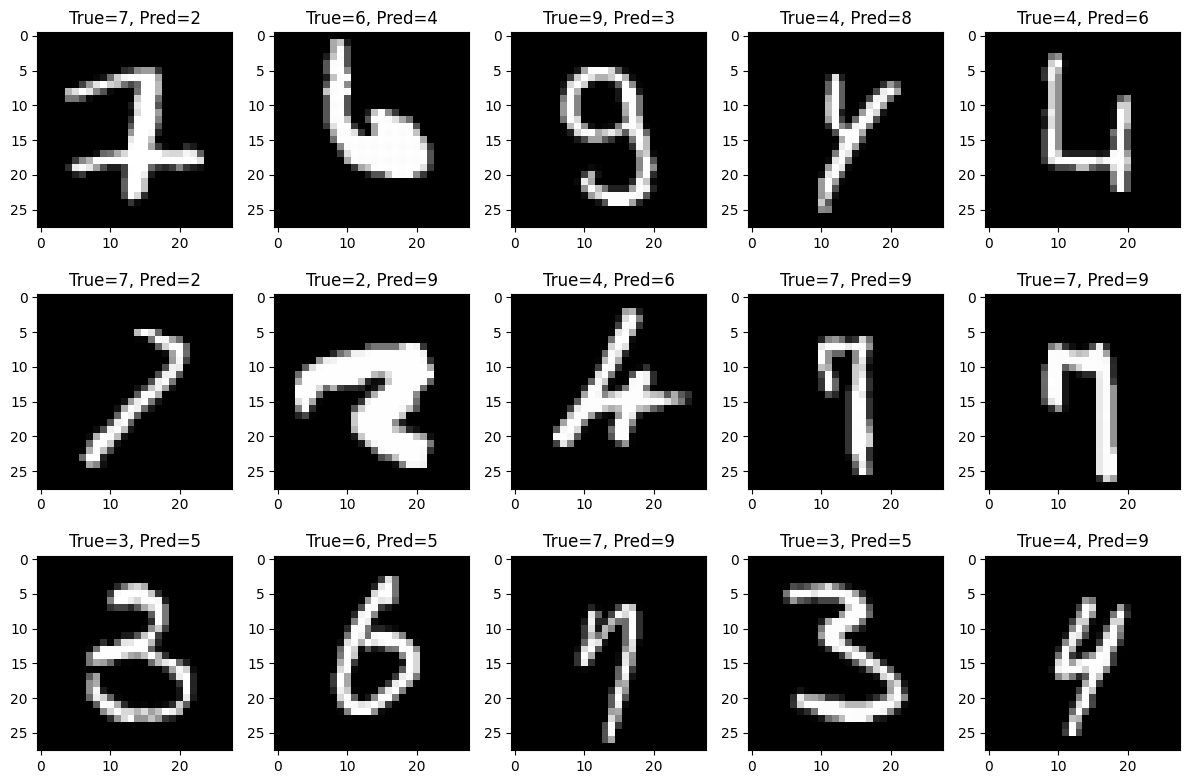

In [31]:
fig, axes2D = plt.subplots(3, 5, figsize=(12, 8))
axes = list(itertools.chain.from_iterable(axes2D))  # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap="gray")
    ax.set_title(f"True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}")
fig.tight_layout()
plt.show()